<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/03_2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%run my_init.py

Mounted at /content/drive


In [7]:
%matplotlib inline

### numpy, ndarray 연습하기

In [8]:
arr = np.arange(1,13).reshape(-1,3) # 4행 3열
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [9]:
arr.ndim, arr.shape # 2차원 , 4행 3열 구조

(2, (4, 3))

In [10]:
arr[0] # 1번째 행

array([1, 2, 3])

In [11]:
arr[0, :] # 1번째 행의 모든 열

array([1, 2, 3])

In [12]:
arr[0][:] # 슬라이싱 이렇게 적는 것도 가능

array([1, 2, 3])

In [13]:
arr[:, 0] # 1번째 열의 모든 행

array([ 1,  4,  7, 10])

In [14]:
arr[:, -1] # 마지막 열

array([ 3,  6,  9, 12])

In [15]:
arr.ravel() # 다차원 배열(array)을 1차원 배열(array)로 평평하게 펴주는 넘파이(numpy) 함수
#1차원 배열을 다차원 배열로 바꾸는 .reshape()과 반대의 기능

# 컴퓨터는 가로 세로 개념이 필요 없으므로, 컴퓨터가 내용을 읽어들일 때 사용함

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [16]:
arr.ravel()[::-1]
# start, stop, step : 처음부터 끝까지 역순으로 출력

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

## k-최근접 이웃의 한계

In [39]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [40]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target) 
print(knr.predict([[50]]))

[1033.33333333]


In [42]:
index = knr.kneighbors([[50]], return_distance=False) # 길이가 50cm 인 농어 주변의 인덱스값 3개 저장
index

array([[34,  8, 14]])

In [43]:
train_input[index[0]] # index와 관련된 첫 번째 열, 엄밀하게 하면 index도 2차원 배열이므로 [0]형태로 넣어준다
# fancy indexing - 넣은 인덱스 값에 길이 값을 반환

array([[44.],
       [43.],
       [43.]])

In [44]:
train_input.shape # 42행 1열

(42, 1)

In [45]:
train_target[index[0]] # 인덱스에 해당하는 무게 예측값 반환

array([1000., 1000., 1100.])

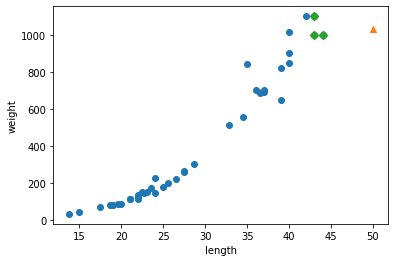

In [46]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input[:, 0], train_target) # 모든 훈련 데이터
plt.scatter(50, 1033, marker='^') # 엄청 무거운 농어
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 그 주변의 샘플 3개 데이터 체크
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
print(np.mean(train_target[indexes]), knr.predict([[100]])) # 3개 이웃의 무게의 평균 = 모델의 예측값

1033.3333333333333 [1033.33333333]


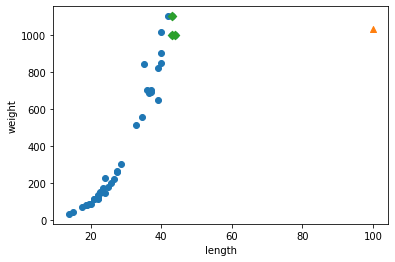

In [48]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input[:, 0], train_target) # 모든 훈련 데이터
plt.scatter(100, 1033, marker='^') # 엄청 무거운 농어
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 그 주변의 샘플 3개 데이터 체크
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
train_input[:, 0].max() #즉, 농어 44g 이상으로 아무리 커져도 무게는 더이상 늘어나지 않음

44.0

In [50]:
knr.predict([[200]]) # 이 모형의 한계

array([1033.33333333])

#선형 회귀(linear regression)

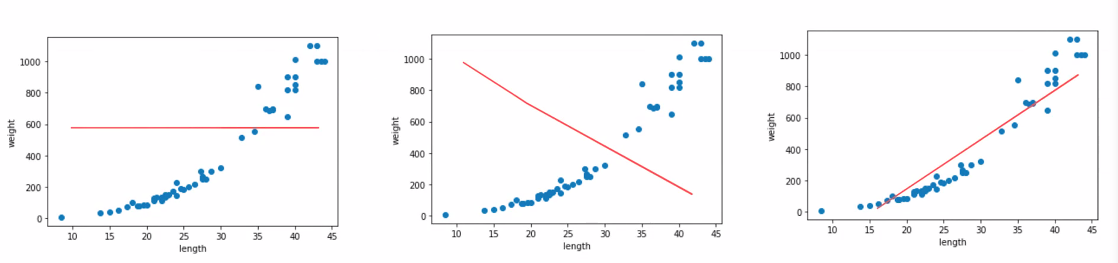

3번이 제일 best 그래프 -> 오차가 제일 적다

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target) # (X,y) 선형회귀 모델 훈련
print(lr.predict([[50]])) # 길이가 50인 농어의 무게 예측 -> y=ax+b 선형 방정식으로 훈련한 결과!

[1241.83860323]


In [52]:
print(lr.coef_, lr.intercept_) #모델 파라미터 (학습에 의해 만들어진 것, coef=기울기, intercept=절편) <- KNN에서는 학습에 의해 만들어진 파라미터가 없었음
# 모델 기반 학습(선형 회귀) <-> 사례 기반 학습(KNN): 훈련세트를 저장하는 것이 훈련의 전부..

# 학습 과정(손실함수=오차를 최소화하는 값을 찾는 과정) 을 통해 구한 것임

# 즉, 농어의 무게 = 39.01714496 * 농어 길이 - 709.0.186449535477

[39.01714496] -709.0186449535477


In [53]:
lr.coef_ * 50 + lr.intercept_

array([1241.83860323])

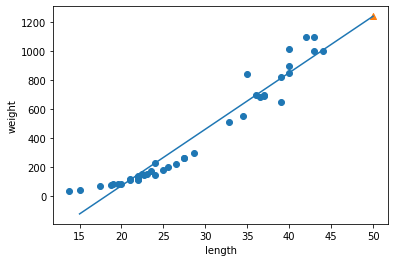

In [54]:
# 훈련 데이터
plt.scatter(train_input, train_target)

# 예측값
plt.plot([15,50], [lr.predict([[15]])[0], lr.predict([[50]])[0]])
#plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) 동일한 표현

# 실제값
plt.scatter(50, lr.predict([[50]])[0], marker='^') # 1241.8 = 실제 무게값
#plt.scatter(50, 1241.8, marker='^') 동일한 표현
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
print(lr.score(train_input, train_target)) # 훈련 점수
print(lr.score(test_input, test_target)) # 테스트 점수
print(f"train - r^2 score: {r2_score(train_target, lr.predict(train_input))}")
print(f"test - r^2 score: {r2_score(test_target, lr.predict(test_input))}")

# 점수가 전체적으로 낮음 = 성능이 떨어진다 = underfit (feature가 하나만 있으므로 overfit는 아님 -> 왼쪽일 가능성 높다)
# 경우에 따라 그래프를 이용하여 해석할 수 있어야 함

# 개선될 여지가 많다 -> 이차방정식 형태로 예측해볼 수 있음

0.939846333997604
0.8247503123313558
train - r^2 score: 0.939846333997604
test - r^2 score: 0.8247503123313558


#다항회귀(polynomia regression)
직선이 아닌 곡선으로 예측해보자 -> 2차 방정식 활용  
단항, 다항 = degree  
단순, 다중 = feature 의 개수

In [59]:
# 원본에 제곱항을 추가하기
# column_stack : Stack 1-D arrays as columns into a 2-D array. 새로운 컬럼 이어 붙이기

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [63]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [64]:
lr.coef_, lr.intercept_

# 무게 = 1.01433211 * 길이^2 + (-21.55792498) * 길이 + 116.0502107827827

(array([  1.01433211, -21.55792498]), 116.0502107827827)

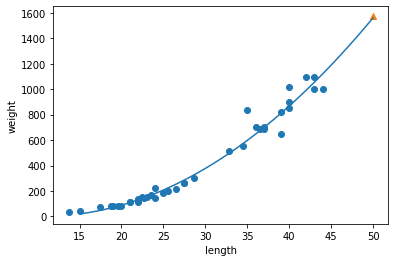

In [70]:
# 학습 데이터
plt.scatter(train_input, train_target)

# 예측값
point = np.arange(15,51)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 실제값
plt.scatter(50, lr.predict([[50**2, 50]]), marker='^')
#plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 단순 다항 회귀

In [66]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 아직도 높은 편은 아님
# 일반적으로 학습 점수가 높고, 테스트 점수가 낮음

# 학습 점수 < 테스트 점수 => underfit (feature가 두개이긴 하지만 모형의 복잡도가 낮은 편)

0.9706807451768623
0.9775935108325122


####<비교>
- K최근접 회귀는 사례기반 머신러닝 모형이므로 feature의 범위 밖에서는 예측하지 못함  
- 선형 회귀는 모델 기반 머신러닝 모현으로 범위 밖에서도 예측 가능하다  

2차 방정식도 선형 회귀라고 할 수 있는가?  
길이^2 = 긴길이 형태로 변수를 치환하여 선형 방정식으로 바꿀 수 있음